# How has political sentiment changed over the course of the pandemic?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from data_processing import *

pd.set_option("display.max_columns", None)

In [2]:
DATA_PATH = "./data/"

## Loading Data

In [3]:
df_dates = pd.read_csv(DATA_PATH + "interventions.csv", index_col="lang")
df_dates = process_interventions_data(df_dates)

## Grouping Countries by Response

In [4]:
def plot_silhouettes(X, k_min, k_max):
    silhouettes = []

    for k in range(k_min, k_max + 1):
        # Cluster the data and assign labels
        labels = KMeans(n_clusters=k, random_state=0).fit_predict(X)
        # Compute the mean Silhouette Coefficient over all samples
        score = silhouette_score(X, labels)
        silhouettes.append({"k": k, "score": score})

    # Convert to dataframe
    silhouettes = pd.DataFrame(silhouettes)

    # Plot the data
    plt.plot(silhouettes.k, silhouettes.score)
    plt.title("Silhouette Score for each value of K")
    plt.xlabel("K")
    plt.ylabel("Silhouette score")


def plot_mobility_response(df, labels=None):
    ax = sns.scatterplot(x=df["Response time"], y=df["Reduced mobility"], hue=labels)

    for idx, row in df.iterrows():
        ax.text(row["Response time"] + 0.5, row["Reduced mobility"], idx)

    plt.title("Reduced mobility vs. Response time")
    plt.xlabel("Response time (days)")
    plt.ylabel("Reduced mobility (days)")

c:\Users\Anton\anaconda3\envs\ada\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anton\anaconda3\envs\ada\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anton\anaconda3\envs\ada\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anton\anaconda3\envs\ada\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is k

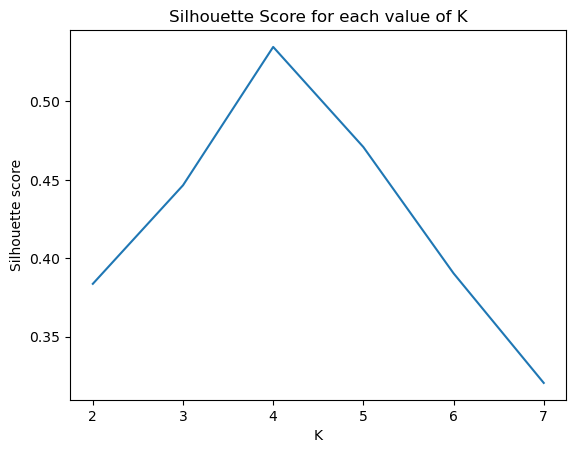

In [5]:
# Select rows where response time and reduced mobility duration are defined
df = df_dates.loc[
    df_dates[["Response time", "Reduced mobility"]].notna().all(1),
    ["Response time", "Reduced mobility"],
]

plot_silhouettes(df, 2, 7)

c:\Users\Anton\anaconda3\envs\ada\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


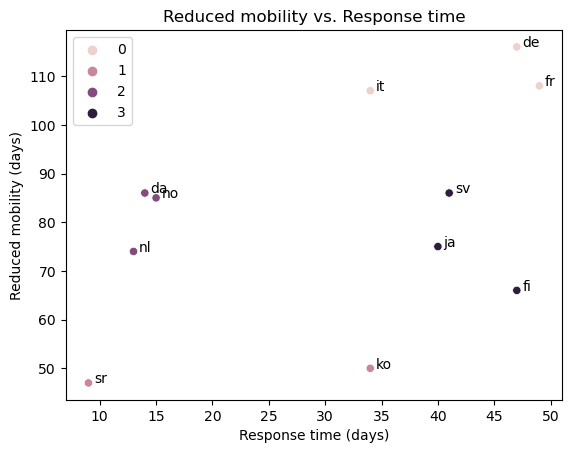

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)

plot_mobility_response(df, kmeans.labels_)

We can identify the following groups of countries:

1. Big European economies which took a long time to react to COVID (possibly due to not wanting to harm the economy) and ended up having long periods of reduced mobility (France, Germany, Italy).

2. Countries with very short periods of reduced mobility (Serbia, South Korea).

3. Smaller highly developed European countries which reacted quickly to COVID and had shorter periods of reduced mobility (Denmark, Netherlands, Norway).

4. Countries which took longer to react to COVID but had shorter periods of reduced mobility (Finland, Japan, Sweden).

In [7]:
# Interventions entry for Spain
df_dates.loc["ca"]

1st case                2020-01-31 00:00:00
1st death               2020-02-13 00:00:00
School closure          2020-03-12 00:00:00
Public events banned    2020-03-08 00:00:00
Lockdown                2020-03-14 00:00:00
Mobility                2020-03-16 00:00:00
Normalcy                                NaT
Response time                          37.0
Reduced mobility                        NaN
Name: ca, dtype: object

Looking at the entry for Spain (Catalan) - the only language not plotted above besides English - we see that the response time was not swift relative to other countries. The datapoint is not plotted due to having an undefined duration of the reduced mobility period, since there is no date for the return to normal mobility levels. We can say that the reduced mobility period is also a long one, which would place Spain in group 1 - big European ecoomies with a long response time and long period of reduced mobility.